In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("wine-quality-white-and-red.csv")

In [3]:
dfnew=pd.DataFrame(df)
dfnew.drop(['type'],axis=1,inplace=True)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [4]:
dfnew.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
dfnew['best quality'] = [1 if x > 5 else 0 for x in dfnew.quality]

In [6]:
features = dfnew.drop(['quality', 'best quality'], axis=1)
target = dfnew['best quality']

features = dfnew.drop(['quality', 'best quality'], axis=1)
target = dfnew['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=42)
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=42)

xtrain.shape, xtest.shape

((5197, 11), (650, 11))

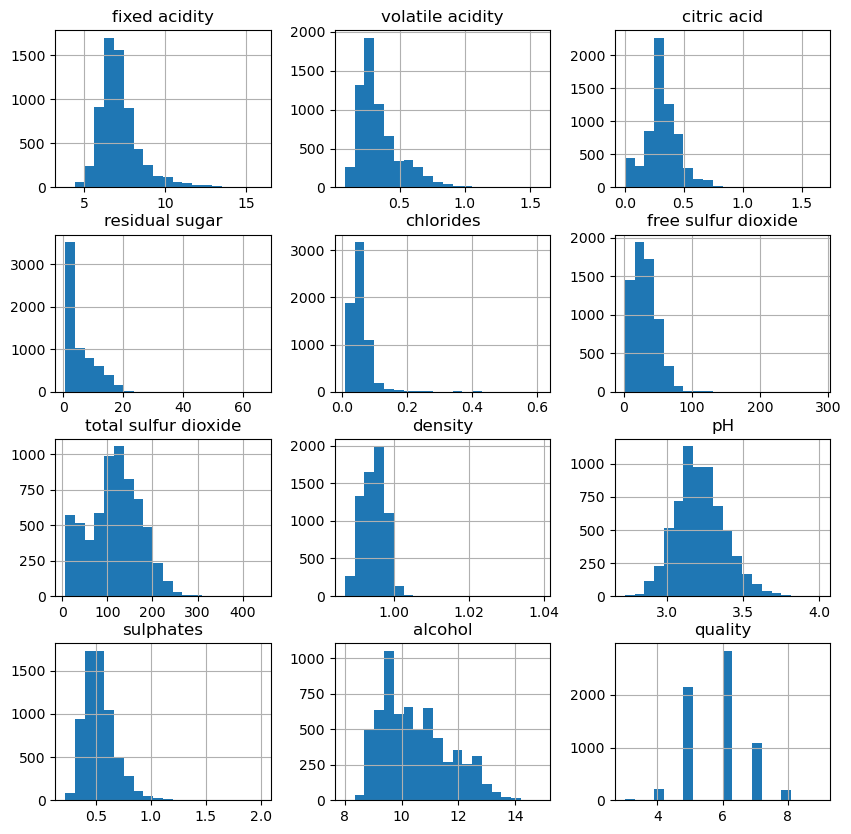

In [7]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

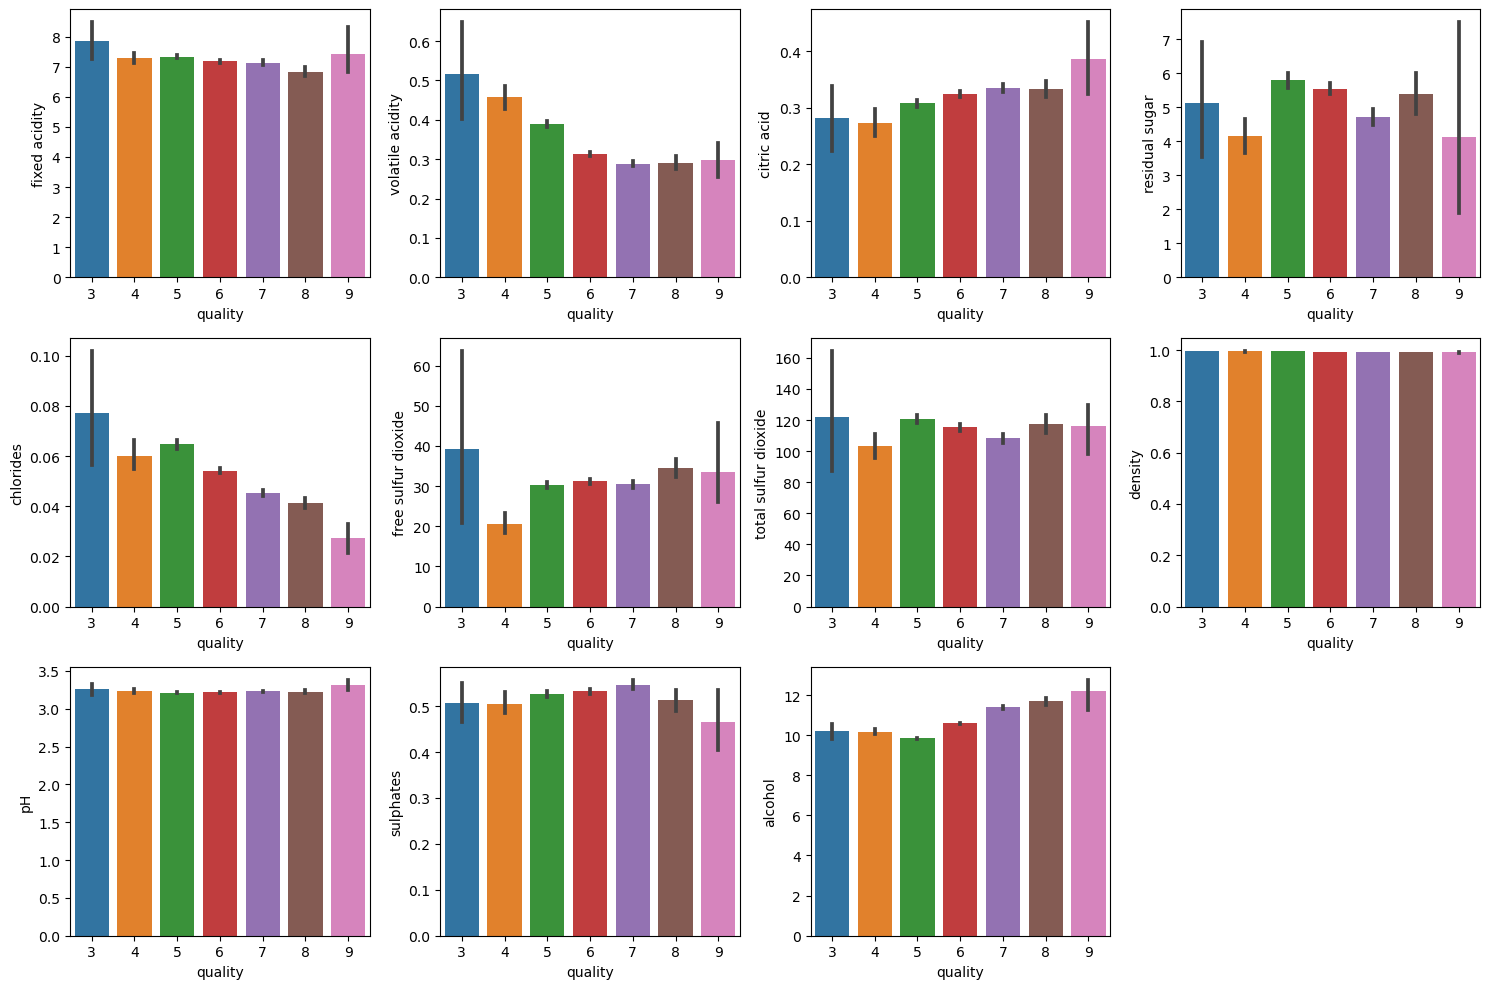

In [8]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)

plt.tight_layout()

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
rf_model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [11]:
yval_pred = rf_model.predict(xval)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [13]:
val_mse = mean_squared_error(yval, yval_pred)
val_mae = mean_absolute_error(yval, yval_pred)
print("Validation MSE:", val_mse)
print("Validation MAE:", val_mae)

Validation MSE: 0.10880938461538461
Validation MAE: 0.24641538461538465


In [14]:
y_test_pred = rf_model.predict(xtest)

In [15]:
import sklearn.metrics as metrics

In [16]:
test_mse = metrics.mean_squared_error(ytest, y_test_pred)
test_mae = metrics.mean_absolute_error(ytest, y_test_pred)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)

Test MSE: 0.11264676923076924
Test MAE: 0.2554461538461538
